In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import pandas as pd
from pathlib import Path
os.environ['pRT_input_data_path'] = os.path.join('/home/mvasist/pRT/input_data_paper/input_data')
from petitRADTRANS import Radtrans
from petitRADTRANS import nat_cst as nc


In [2]:
path = Path('.') / 'WISEJ1738_HST.txt'
spec= pd.DataFrame()
spec = pd.read_csv(path, header=0, delimiter = ',')

path_ = Path('.') / 'WISE1828.fl.txt'
spec_ = pd.DataFrame()
spec_ = pd.read_csv( Path('.')/ 'WISE1828.fl.txt', delim_whitespace= True, header=1)


In [3]:
spec

,wavelength[um],flux[cW/m2/nm],error[cW/m2/nm]
0,1.10300,1.328564e-18,3.226870e-19
1,1.10765,9.855751e-19,2.793540e-19
2,1.11230,6.697327e-19,2.489953e-19
3,1.11695,4.162168e-19,2.356254e-19
4,1.12160,2.969137e-19,2.288345e-19
...,...,...,...
124,1.67960,-5.035880e-19,2.463581e-19
125,1.68425,-5.231916e-19,3.207213e-19
126,1.68890,1.903789e-19,4.195772e-19
127,1.69355,2.577735e-19,5.263703e-19


<ErrorbarContainer object of 3 artists>

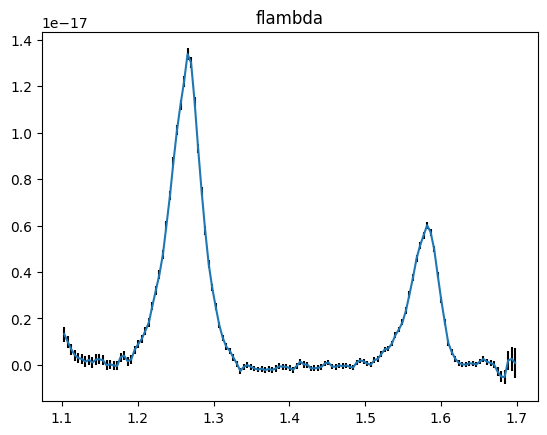

In [9]:
plt.title('Flambda')
plt.errorbar(spec.iloc[:,0], spec.iloc[:,1], yerr= spec.iloc[:,2], ecolor= 'black')

<ErrorbarContainer object of 3 artists>

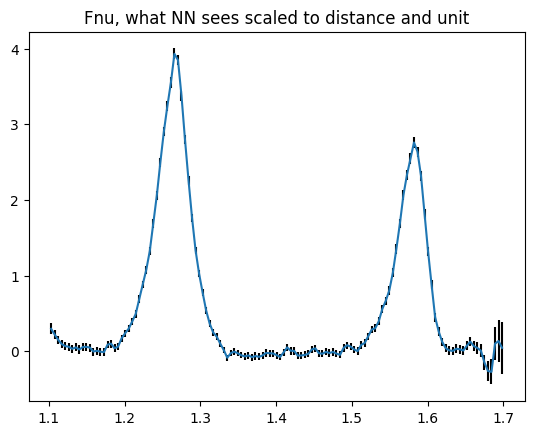

In [17]:
plt.title('Fnu, what NN sees scaled to distance and unit')
plt.errorbar(spec.iloc[:,0], fLtofnu(spec.iloc[:,1],spec.iloc[:,0])*1e1 *1e5*(7.34/9.9)**2, yerr= fLtofnu(spec.iloc[:,2],spec.iloc[:,0])*1e1 *1e5*(7.34/9.9)**2, ecolor= 'black')

In [11]:
def fLtofnu(x, wlen):
    ## converting W/m2/um to Jy
    x = x * 1e7 * 1e23 * (wlen*1e-4)**2. / nc.c   
    return x

def fnutofL(x, wlen):
    ## converting Jy to W/m2/um 
    x = x * nc.c / 1e7 * 1e23 * (wlen*1e-4)**2. 
    return x

## Comparing with WISEJ1828 and WISEJ1738 (Jy) (as seen by NN)

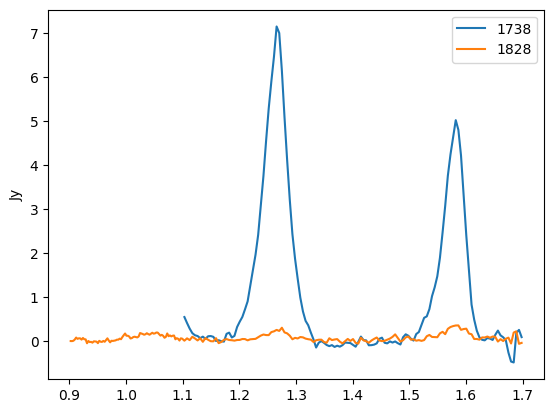

In [6]:
plt.plot(spec.iloc[:,0].values, fLtofnu(spec.iloc[:,1].values*1e1,spec.iloc[:,0].values) *1e5 , label = '1738')
plt.plot(spec_.iloc[:,0].values, fLtofnu(spec_.iloc[:,1].values,spec_.iloc[:,0].values) *1e5 , label = '1828')
plt.legend()
plt.ylabel('Jy')
plt.show()

## Comparing with WISEJ1828 and WISEJ1738 W/m2/um


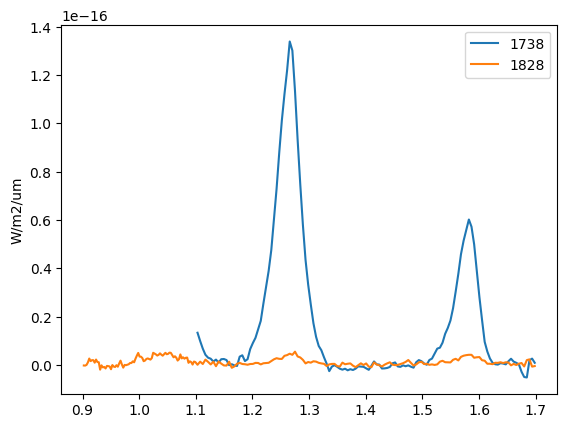

In [7]:
plt.plot(spec.iloc[:,0].values, spec.iloc[:,1].values*1e1 , label = '1738')
plt.plot(spec_.iloc[:,0].values, spec_.iloc[:,1].values, label = '1828')
plt.legend()
plt.ylabel('W/m2/um')
plt.show()

## As in Kirkpatrick et al 2016(?) - normalising around the 1.58195 peak

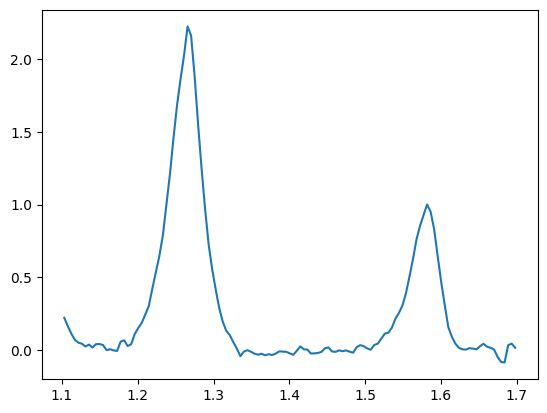

In [27]:
plt.plot(spec.iloc[:,0].values, spec.iloc[:,1].values/6.01472612131e-18)